In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('data_training.csv', sep=';')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429999 entries, 0 to 429998
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    429999 non-null  object
 1   X1      429999 non-null  object
 2   X2      411191 non-null  object
 3   Y       429999 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 13.1+ MB


In [ ]:
df_train.head(5)

,Date,X1,X2,Y
0,07/01/12,,NaN,71864183015
1,07/01/12,,A,32640358590
2,07/01/12,,B,30845698143
3,07/01/12,,C,39580783266
4,07/01/12,,D,30442401289


In [ ]:
df_train.drop(columns=['Date'], inplace=True)

In [ ]:
df_train.head(5)

,X1,X2,Y
0,,NaN,71864183015
1,,A,32640358590
2,,B,30845698143
3,,C,39580783266
4,,D,30442401289


In [ ]:
df_train.isnull().sum()

X1        0
X2    18808
Y         0
dtype: int64

In [ ]:
# df_train = df_train.interpolate(method='bfill')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in df_train.columns:
    if i != 'Y':
        if df_train[i].dtypes == object:
            df_train[i] = labelencoder.fit_transform(df_train[i])

In [ ]:
df_train.isnull().sum()

X1    0
X2    0
Y     0
dtype: int64

In [ ]:
df_train['Y'] = df_train['Y'].astype(float) / 10000000000

In [ ]:
df_train.head(50)

,X1,X2,Y
0,0,22,7.186418
1,0,0,3.264036
2,0,1,3.084570
3,0,2,3.958078
4,0,3,3.044240
5,0,4,2.975792
6,0,5,3.999781
7,0,6,7.434890
8,0,7,3.482118
9,0,8,3.049072


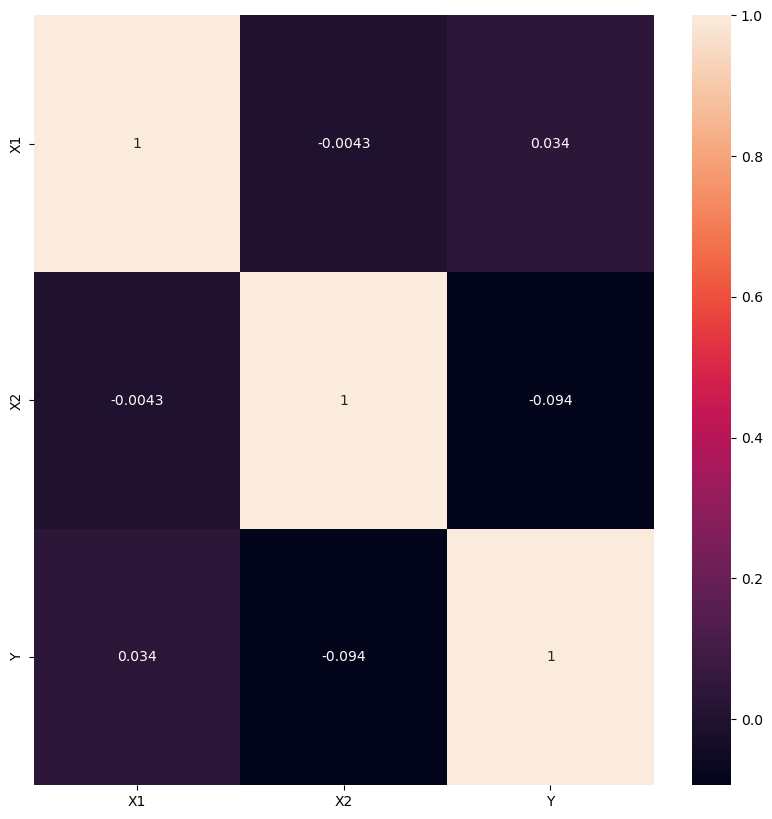

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [ ]:
features = ['X1','X2']
x = df_train[features]
y = df_train['Y']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x= pd.DataFrame(scaler.transform(x),
                              columns = x.columns)

x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429999 entries, 0 to 429998
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      429999 non-null  float64
 1   X2      429999 non-null  float64
dtypes: float64(2)
memory usage: 6.6 MB
<class 'pandas.core.series.Series'>
RangeIndex: 429999 entries, 0 to 429998
Series name: Y
Non-Null Count   Dtype  
--------------   -----  
429999 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


In [ ]:
x.head()

,X1,X2
0,-1.695028,1.708491
1,-1.695028,-1.644549
2,-1.695028,-1.492138
3,-1.695028,-1.339727
4,-1.695028,-1.187316


In [ ]:
RANDOM_STATE = 0
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
X_train, X_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, random_state = RANDOM_STATE)

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators = 100,random_state=RANDOM_STATE).fit(X_train,y_train)

In [ ]:
print(f"Metrics train:\n\tMAE: {mean_absolute_error(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tMAE: {mean_absolute_error(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	MAE: 2.1453
Metrics test:
	MAE: 2.0877


In [ ]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree_model = DecisionTreeRegressor(random_state=RANDOM_STATE).fit(X_train,y_train)

In [ ]:
print(f"Metrics train:\n\tMAE: {mean_absolute_error(Decision_Tree_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tMAE: {mean_absolute_error(Decision_Tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	MAE: 2.1436
Metrics test:
	MAE: 2.0860


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error

# Create individual models
rf_model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
dt_model = DecisionTreeRegressor(random_state=RANDOM_STATE)


# Train individual models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions with individual models
rf_pred = rf_model.predict(X_val)
dt_pred = dt_model.predict(X_val)

# Evaluate individual models
rf_MAE = mean_absolute_error(y_val, rf_pred)
dt_MAE = mean_absolute_error(y_val, dt_pred)
print(f'Random Forest MAE: {rf_MAE}')
print(f'Decision Tree MAE: {dt_MAE}')

# Create an ensemble model
ensemble_model = VotingRegressor(estimators=[('Random Forest', rf_model), ('Decision Tree', dt_model)])
ensemble_model.fit(X_train, y_train)

# Make predictions with the ensemble model
ensemble_pred = ensemble_model.predict(X_val)

# Evaluate the ensemble model
ensemble_MAE = mean_absolute_error(y_val, ensemble_pred)
print(f'Ensemble MAE: {ensemble_MAE}')

Random Forest MAE: 2.087709666984503
Decision Tree MAE: 2.086017329820139
Ensemble MAE: 2.0868580724702563


In [ ]:
x.describe()

,X1,X2
count,4.299990e+05,4.299990e+05
mean,8.162998e-17,-6.743562e-17
std,1.000001e+00,1.000001e+00
min,-1.695028e+00,-1.644549e+00
25%,-8.990684e-01,-8.824942e-01
50%,-3.614219e-03,3.197128e-02
75%,8.918399e-01,7.940258e-01
max,1.687799e+00,1.708491e+00


In [ ]:
Decision_Tree_model = DecisionTreeRegressor(random_state=RANDOM_STATE).fit(x,y)

In [ ]:
df_test = pd.read_csv('data_testing.csv',sep=';')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47049 entries, 0 to 47048
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      47049 non-null  object
 1   Date    47049 non-null  object
 2   X1      47049 non-null  object
 3   X2      44971 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [ ]:
df_test.head(5)

,id,Date,X1,X2
0,b1,30/07/22,Propinsi 04,Z
1,b2,30/07/22,Propinsi 05,NaN
2,b3,30/07/22,Propinsi 05,A
3,b4,30/07/22,Propinsi 05,B
4,b5,30/07/22,Propinsi 05,C


In [ ]:
for i in df_test[features].columns:
        if df_test[i].dtypes == object:
            df_test[i] = labelencoder.fit_transform(df_test[i])

In [ ]:
df_test.head(10)

,id,Date,X1,X2
0,b1,30/07/22,4,21
1,b2,30/07/22,5,22
2,b3,30/07/22,5,0
3,b4,30/07/22,5,1
4,b5,30/07/22,5,2
5,b6,30/07/22,5,3
6,b7,30/07/22,5,4
7,b8,30/07/22,5,5
8,b9,30/07/22,5,6
9,b10,30/07/22,5,7


In [ ]:
df_test[features]= pd.DataFrame(scaler.transform(df_test[features]),
                              columns = df_test[features].columns)

In [ ]:
df_test[features].head(10)

,X1,X2
0,-1.297048,1.556080
1,-1.197553,1.708491
2,-1.197553,-1.644549
3,-1.197553,-1.492138
4,-1.197553,-1.339727
5,-1.197553,-1.187316
6,-1.197553,-1.034905
7,-1.197553,-0.882494
8,-1.197553,-0.730083
9,-1.197553,-0.577672


In [ ]:
predictions = Decision_Tree_model.predict(df_test[features])

In [ ]:
predictions[0]

3.2388195760655156

In [ ]:
predictions = (predictions * 10000000000)

In [ ]:
predictions[0]

32388195760.655155

In [ ]:
output = pd.DataFrame({'id':df_test.id,'Y':predictions})
output.to_csv('submission_9(04-11-2023).csv', index=False)

In [ ]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47049 entries, 0 to 47048
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      47049 non-null  object 
 1   Y       47049 non-null  float64
dtypes: float64(1), object(1)
memory usage: 735.3+ KB
